<a href="https://colab.research.google.com/github/SwATTiX/Algorithms/blob/main/Face_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simple Face Recognition
Here we will recognise the faces of me and my two friends separately.

Install the required face_recognition library. If you are using colab be sure to change the runtime to use the GPU before installation.

In [ ]:
!pip install face_recognition

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 100.1 MB 32 kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566186 sha256=be83d4f32de106d069c9b85e42760e04f0c76200743c42646d0c74f11f69af2b
  Stored in directory: /root/.cache/pip/wheels/d6/81/3c/884bcd5e1c120ff548d57c2ecc9ebf3281c9a6f7c0e7e7947a
Successfully built face-recognition-models


Next do the imports and the known faces encoding for them to be matched against the unknown ones.

In [17]:
#library imports
import face_recognition
import numpy as np
from google.colab.patches import cv2_imshow
import cv2

# Creating the encoding profiles
face_1 = face_recognition.load_image_file("SWATTIK KUNDU_12019009022067_CST_3F.jpg")
face_1_encoding = face_recognition.face_encodings(face_1)[0]

face_2 = face_recognition.load_image_file("subham.jpg")
face_2_encoding = face_recognition.face_encodings(face_2)[0]

face_3 = face_recognition.load_image_file("uttarayan.jpg")
face_3_encoding = face_recognition.face_encodings(face_3)[0]

face_4 = face_recognition.load_image_file("riju.jpg")
face_4_encoding = face_recognition.face_encodings(face_4)[0]

face_5 = face_recognition.load_image_file("rajdeep.jpg")
face_5_encoding = face_recognition.face_encodings(face_5)[0]

known_face_encodings = [
                        face_1_encoding,
                        face_2_encoding,
                        face_3_encoding,
                        face_4_encoding,
                        face_5_encoding
]

known_face_names = [
                    "Swattik",
                    "Subham",
                    "Uttarayan",
                    "Riju",
                    "Rajdeep"
]

Next we do the recognition module.

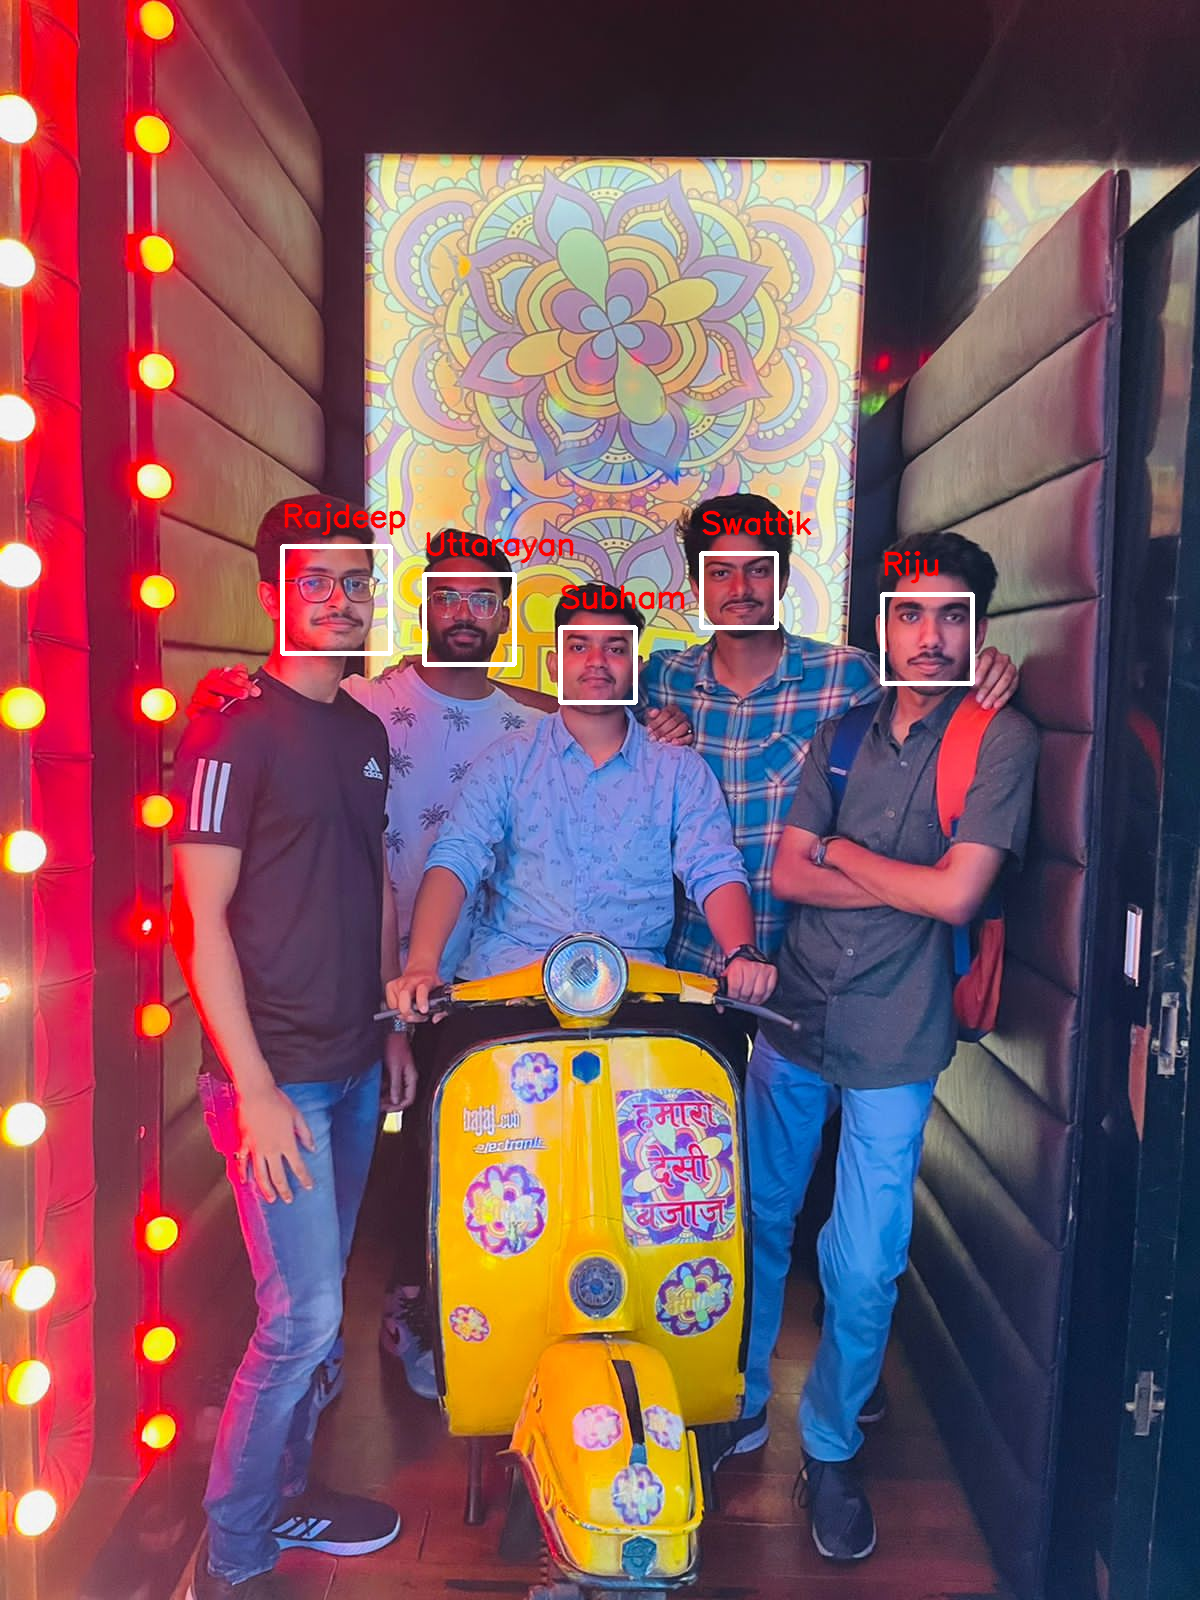

In [21]:
file_name = "desi5.jpeg"
unknown_image = face_recognition.load_image_file(file_name)
unknown_image_to_draw = cv2.imread(file_name)

face_locations = face_recognition.face_locations(unknown_image)
face_encodings = face_recognition.face_encodings(unknown_image, face_locations)

for (top,right, bottom, left), face_encoding in zip(face_locations, face_encodings):
  matches = face_recognition.compare_faces(known_face_encodings, face_encoding)

  name = "Unknown"

  face_distances = face_recognition.face_distance(known_face_encodings, face_encoding)
  best_match_index = np.argmin(face_distances)
  if matches[best_match_index]:
    name = known_face_names[best_match_index]
  cv2.rectangle(unknown_image_to_draw, (left, top), (right, bottom),(255,255,255),3)
  cv2.putText(unknown_image_to_draw,name, (left, top-20), cv2.FONT_HERSHEY_SIMPLEX,1,(0,0,255),2, cv2.LINE_AA)

cv2_imshow(unknown_image_to_draw)
